# Case Study

### IMPORTANT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### READ/LOAD THE FILE

In [2]:
df = pd.read_csv('customer_churn_data.csv')

In [3]:
df.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


In [4]:
# View all columns
df.columns

Index(['year', 'customer_id', 'phone_no', 'gender', 'age',
       'no_of_days_subscribed', 'multi_screen', 'mail_subscribed',
       'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins',
       'weekly_max_night_mins', 'videos_watched', 'maximum_days_inactive',
       'customer_support_calls', 'churn'],
      dtype='object')

In [5]:
df['churn'].head()

0    0.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: churn, dtype: float64

In [6]:
#  Check unique values in a column
df['churn'].unique()

array([ 0.,  1., nan])

In [8]:
#  Count of values
df['churn'].value_counts()

churn
0.0    1703
1.0     262
Name: count, dtype: int64

In [9]:
df['churn'].value_counts(dropna=False)

churn
0.0    1703
1.0     262
NaN      35
Name: count, dtype: int64

In [11]:
# Normalisation
df['churn'].value_counts(dropna=False, normalize=True)

churn
0.0    0.8515
1.0    0.1310
NaN    0.0175
Name: proportion, dtype: float64

In [12]:
df['churn'].value_counts(dropna=False, normalize=True) * 100

churn
0.0    85.15
1.0    13.10
NaN     1.75
Name: proportion, dtype: float64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    2000 non-null   int64  
 1   customer_id             2000 non-null   int64  
 2   phone_no                2000 non-null   object 
 3   gender                  1976 non-null   object 
 4   age                     2000 non-null   int64  
 5   no_of_days_subscribed   2000 non-null   int64  
 6   multi_screen            2000 non-null   object 
 7   mail_subscribed         2000 non-null   object 
 8   weekly_mins_watched     2000 non-null   float64
 9   minimum_daily_mins      2000 non-null   float64
 10  maximum_daily_mins      2000 non-null   float64
 11  weekly_max_night_mins   2000 non-null   int64  
 12  videos_watched          2000 non-null   int64  
 13  maximum_days_inactive   1972 non-null   float64
 14  customer_support_calls  2000 non-null   

In [15]:
# Missing values analysis
df.isnull().sum()

year                       0
customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

In [16]:
df.describe()

,year,customer_id,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
count,2000.0,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1972.000000,2000.000000,1965.000000
mean,2015.0,554887.157500,38.69050,99.750000,270.178425,10.198700,30.620780,100.415500,4.482500,3.250507,1.547000,0.133333
std,0.0,261033.690318,10.20641,39.755386,80.551627,2.785519,9.129165,19.529454,2.487728,0.809084,1.315164,0.340021
min,2015.0,100198.000000,18.00000,1.000000,0.000000,0.000000,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,328634.750000,32.00000,73.000000,218.212500,8.400000,24.735000,87.000000,3.000000,3.000000,1.000000,0.000000
50%,2015.0,567957.500000,37.00000,99.000000,269.925000,10.200000,30.590000,101.000000,4.000000,3.000000,1.000000,0.000000
75%,2015.0,773280.250000,44.00000,127.000000,324.675000,12.000000,36.797500,114.000000,6.000000,4.000000,2.000000,0.000000
max,2015.0,999961.000000,82.00000,243.000000,526.200000,20.000000,59.640000,175.000000,19.000000,6.000000,9.000000,1.000000


In [17]:
df.describe(include=object)

,phone_no,gender,multi_screen,mail_subscribed
count,2000,1976,2000,2000
unique,2000,2,2,2
top,409-8743,Male,no,no
freq,1,1053,1802,1430


In [19]:
df.describe(include='all')

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
count,2000.0,2000.000000,2000,1976,2000.00000,2000.000000,2000,2000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1972.000000,2000.000000,1965.000000
unique,NaN,NaN,2000,2,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,409-8743,Male,NaN,NaN,no,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,1053,NaN,NaN,1802,1430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2015.0,554887.157500,NaN,NaN,38.69050,99.750000,NaN,NaN,270.178425,10.198700,30.620780,100.415500,4.482500,3.250507,1.547000,0.133333
std,0.0,261033.690318,NaN,NaN,10.20641,39.755386,NaN,NaN,80.551627,2.785519,9.129165,19.529454,2.487728,0.809084,1.315164,0.340021
min,2015.0,100198.000000,NaN,NaN,18.00000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,328634.750000,NaN,NaN,32.00000,73.000000,NaN,NaN,218.212500,8.400000,24.735000,87.000000,3.000000,3.000000,1.000000,0.000000
50%,2015.0,567957.500000,NaN,NaN,37.00000,99.000000,NaN,NaN,269.925000,10.200000,30.590000,101.000000,4.000000,3.000000,1.000000,0.000000
75%,2015.0,773280.250000,NaN,NaN,44.00000,127.000000,NaN,NaN,324.675000,12.000000,36.797500,114.000000,6.000000,4.000000,2.000000,0.000000


In [21]:
df.drop(['year'], axis=1, inplace=True)

In [22]:
df.head()

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


In [23]:
df['churn'].map({0.0: 'Subscriber', 1.0: 'Unsubscribed'})

0         Subscriber
1         Subscriber
2       Unsubscribed
3         Subscriber
4         Subscriber
            ...     
1995             NaN
1996      Subscriber
1997      Subscriber
1998      Subscriber
1999    Unsubscribed
Name: churn, Length: 2000, dtype: object

In [24]:
df['churn'] = df['churn'].map({0.0: 'Subscriber', 1.0: 'Unsubscribed'})

In [25]:
df.head()

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,Subscriber
1,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,Subscriber
2,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,Unsubscribed
3,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,Subscriber
4,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,Subscriber


In [26]:
df['phone_no']

0       409-8743
1       340-5930
2       372-3750
3       331-4902
4       351-8398
          ...   
1995    385-7387
1996    383-9255
1997    353-2080
1998    359-7788
1999    414-1496
Name: phone_no, Length: 2000, dtype: object

In [27]:
df['gender'].value_counts(dropna=False)

gender
Male      1053
Female     923
NaN         24
Name: count, dtype: int64

In [28]:
# max time appeared gender
df['gender'].mode()

0    Male
Name: gender, dtype: object

In [32]:
df['gender'].value_counts(dropna=False).max()

1053

In [33]:
df['gender'].value_counts(dropna=False).idxmax()

'Male'

In [34]:
df['multi_screen'].value_counts(dropna=False)

multi_screen
no     1802
yes     198
Name: count, dtype: int64

In [35]:
df['mail_subscribed'].value_counts(dropna=False)

mail_subscribed
no     1430
yes     570
Name: count, dtype: int64

In [36]:
df['churn'].value_counts(dropna=False)

churn
Subscriber      1703
Unsubscribed     262
NaN               35
Name: count, dtype: int64

In [37]:
df.head()

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,Subscriber
1,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,Subscriber
2,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,Unsubscribed
3,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,Subscriber
4,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,Subscriber


In [39]:
df.loc[4]

customer_id                   101653
phone_no                    351-8398
gender                        Female
age                               40
no_of_days_subscribed            191
multi_screen                      no
mail_subscribed                   no
weekly_mins_watched            243.0
minimum_daily_mins              10.9
maximum_daily_mins             27.54
weekly_max_night_mins             83
videos_watched                     7
maximum_days_inactive            3.0
customer_support_calls             1
churn                     Subscriber
Name: 4, dtype: object

In [40]:
df.nunique()

customer_id               1999
phone_no                  2000
gender                       2
age                         63
no_of_days_subscribed      204
multi_screen                 2
mail_subscribed              2
weekly_mins_watched       1260
minimum_daily_mins         149
maximum_daily_mins        1260
weekly_max_night_mins      111
videos_watched              19
maximum_days_inactive        7
customer_support_calls      10
churn                        2
dtype: int64

In [41]:
df['maximum_days_inactive'].head()

0    4.0
1    3.0
2    4.0
3    3.0
4    3.0
Name: maximum_days_inactive, dtype: float64

In [42]:
df['maximum_days_inactive'].value_counts()

maximum_days_inactive
3.0    945
4.0    645
2.0    273
5.0     85
1.0     12
0.0     10
6.0      2
Name: count, dtype: int64

In [46]:
df['churn'].value_counts(dropna=False, normalize=True) * 100

churn
Subscriber      85.15
Unsubscribed    13.10
NaN              1.75
Name: proportion, dtype: float64

In [47]:
df['mail_subscribed'].value_counts(dropna=False, normalize=True) * 100

mail_subscribed
no     71.5
yes    28.5
Name: proportion, dtype: float64

In [48]:
df['multi_screen'].value_counts(dropna=False, normalize=True) * 100

multi_screen
no     90.1
yes     9.9
Name: proportion, dtype: float64

In [49]:
df['gender'].value_counts(dropna=False, normalize=True) * 100

gender
Male      52.65
Female    46.15
NaN        1.20
Name: proportion, dtype: float64

# Visuals

[]

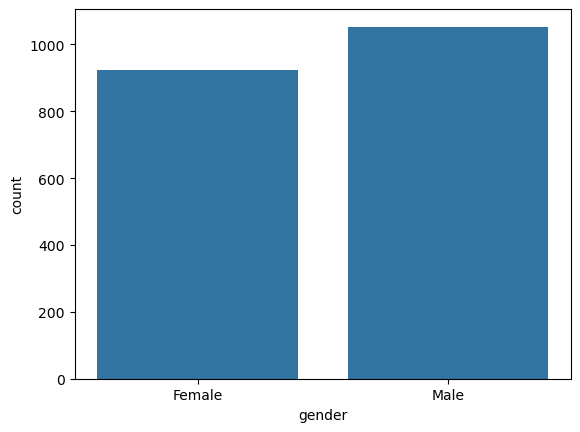

In [50]:
sns.countplot(x='gender', data=df)
plt.plot()

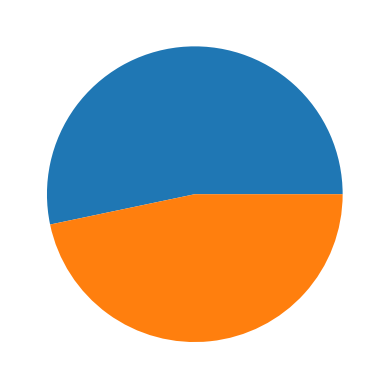

In [52]:
plt.pie(df['gender'].value_counts())
plt.show()

In [53]:
df['gender'].value_counts()

gender
Male      1053
Female     923
Name: count, dtype: int64

In [54]:
df['gender'].value_counts().index

Index(['Male', 'Female'], dtype='object', name='gender')

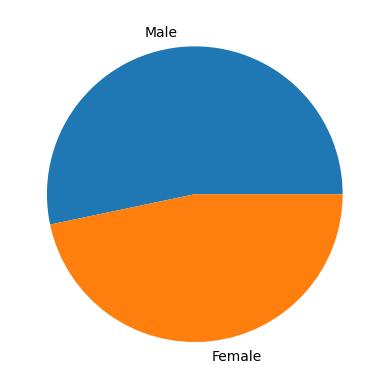

In [55]:
plt.pie(df['gender'].value_counts(), labels=df['gender'].value_counts().index)
plt.show()

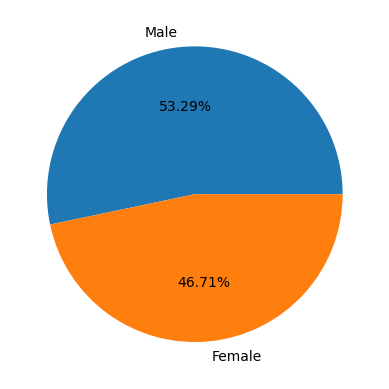

In [56]:
plt.pie(df['gender'].value_counts(), labels=df['gender'].value_counts().index, autopct='%.2f%%')
plt.show()

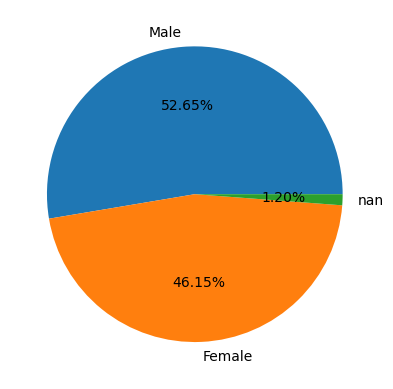

In [58]:
plt.pie(df['gender'].value_counts(dropna=False), labels=df['gender'].value_counts(dropna=False).index, autopct='%.2f%%')
plt.show()

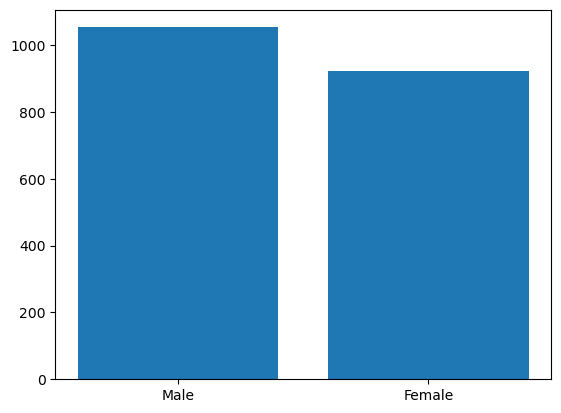

In [59]:
plt.bar(df['gender'].value_counts().index, df['gender'].value_counts())
plt.show()

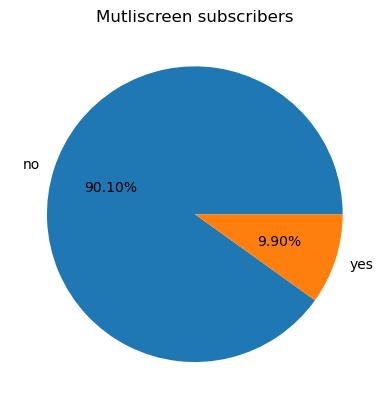

In [61]:
plt.pie( df['multi_screen'].value_counts(dropna=False), labels=df['multi_screen'].value_counts(dropna=False).index, autopct='%.2f%%')
plt.title('Mutliscreen subscribers')
plt.show()

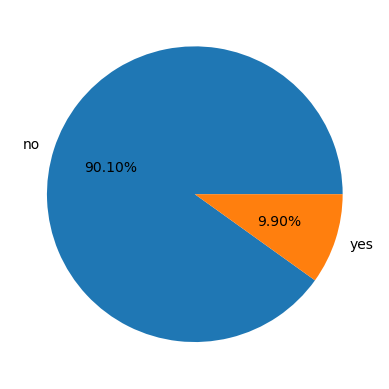

In [62]:
plt.pie(df['multi_screen'].value_counts(dropna=False), labels=df['multi_screen'].value_counts(dropna=False).index, autopct='%.2f%%')
plt.show()

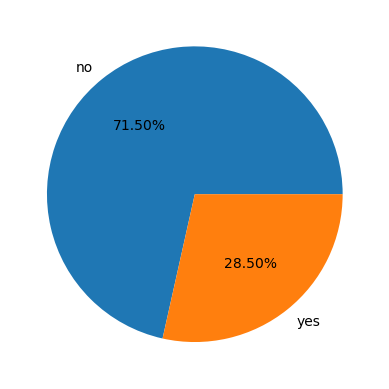

In [63]:
plt.pie(df['mail_subscribed'].value_counts(dropna=False), labels=df['mail_subscribed'].value_counts(dropna=False).index, autopct='%.2f%%')
plt.show()

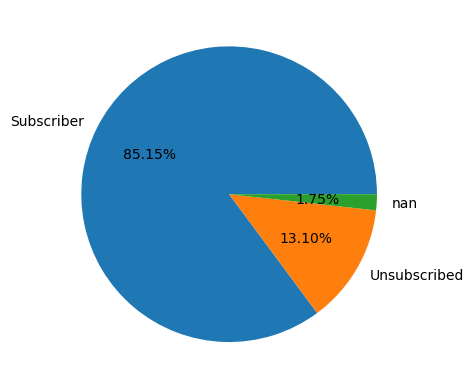

In [64]:
plt.pie(df['churn'].value_counts(dropna=False), labels=df['churn'].value_counts(dropna=False).index, autopct='%.2f%%')
plt.show()

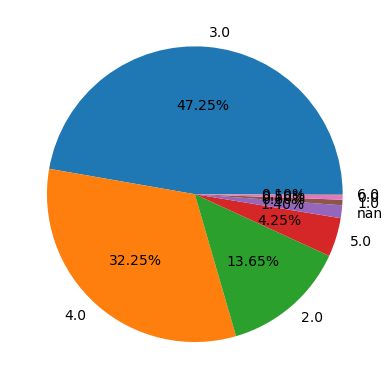

In [67]:
plt.pie(df['maximum_days_inactive'].value_counts(dropna=False), labels=df['maximum_days_inactive'].value_counts(dropna=False).index, autopct='%.2f%%')
plt.show()

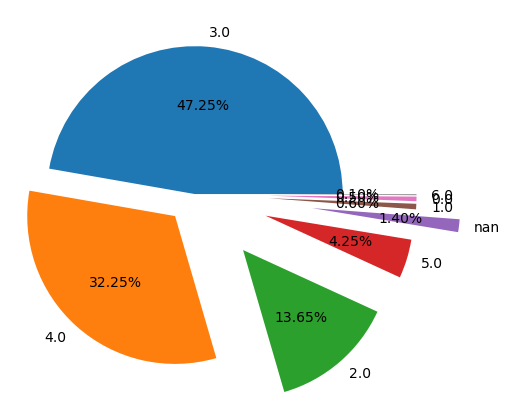

In [70]:
plt.pie(
    df['maximum_days_inactive'].value_counts(dropna=False), 
    labels=df['maximum_days_inactive'].value_counts(dropna=False).index, 
    autopct='%.2f%%',
    explode=[0, .2, .5, .5, .8, .5, .5, .5]
)
plt.show()

# How to handle missing data

- Filling the values
- Delete the columns
- Delete the record

1. Filling the values
 - for number columns, we can fill the value with median or mean
 - for categorical column, we can fill the values with mode (most frequent values), least frequent value, or a new category
2. Deleting column
 - If the columns has more than 30-40% data missing then we cna delete columns
 - This is not a rule of thumb, we can be flexible here depending on our usecase
3. Deleting row 
 - not recommended

In [71]:
df['gender'].value_counts(dropna=False)

gender
Male      1053
Female     923
NaN         24
Name: count, dtype: int64

In [72]:
df['gender'].mode()

0    Male
Name: gender, dtype: object

In [73]:
df['gender'].mode().iloc[0]

'Male'

In [74]:
df.isna().sum()

customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

In [75]:
df['maximum_days_inactive'].mean()

np.float64(3.2505070993914806)

In [76]:
df['maximum_days_inactive'].median()

3.0

In [78]:
df['churn'].value_counts().idxmin()

'Unsubscribed'

In [79]:
df = df.fillna(
    {
        'gender': df['gender'].mode().iloc[0],
        'maximum_days_inactive': df['maximum_days_inactive'].median(),
        'churn': df['churn'].value_counts().idxmin()
    }
)

In [80]:
df.isna().sum()

customer_id               0
phone_no                  0
gender                    0
age                       0
no_of_days_subscribed     0
multi_screen              0
mail_subscribed           0
weekly_mins_watched       0
minimum_daily_mins        0
maximum_daily_mins        0
weekly_max_night_mins     0
videos_watched            0
maximum_days_inactive     0
customer_support_calls    0
churn                     0
dtype: int64